In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset

In [2]:
class Mydataset(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x,dtype = torch.float32)
        self.y = torch.tensor(y,dtype = torch.float32)
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
    def __len__(self):
        return len(self.x)

In [3]:
import numpy as np
data = np.sin(np.arange(0,10,0.1))

In [4]:
val = np.arange(0,10,0.1)

In [5]:
seq_length = 10
x = []
y = []
for i in range(len(data)-seq_length-1):
    x_seq = []
    for j in range(i,i+seq_length):
        x_seq.append(data[j])
    x.append(x_seq)
    y.append(data[j+1])

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size = 0.2)

In [7]:
train_dataset = Mydataset(x_train,y_train)
train_loader = DataLoader(train_dataset,shuffle = True,batch_size = 4)

In [8]:
class RNNclassifier(nn.Module):
    def __init__(self):
        super(RNNclassifier, self).__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=5, num_layers=1, batch_first=True)
        self.activation = nn.ReLU()
        self.last_layer = nn.Linear(5, 1)

    def forward(self, x):
        output, _status = self.rnn(x)
        output = output[:, -1, :]  # Selecting the output of the last time step
        output = self.activation(output)
        return self.last_layer(output)


In [9]:
model = RNNclassifier()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr = 0.01)

In [10]:
epochs = 350

# training loop
for i in range(epochs):
    for j, data in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = model(data[:][0].view(-1,seq_length,
                                       1)).reshape(-1)
        loss = loss_fn(y_pred, data[:][1])
        loss.backward()
        optimizer.step()
    if i % 50 == 0:
        print(i, "th iteration : ", loss)

0 th iteration :  tensor(0.6350, grad_fn=<MseLossBackward0>)
50 th iteration :  tensor(0.0004, grad_fn=<MseLossBackward0>)
100 th iteration :  tensor(0.0003, grad_fn=<MseLossBackward0>)
150 th iteration :  tensor(3.1056e-05, grad_fn=<MseLossBackward0>)
200 th iteration :  tensor(4.6083e-05, grad_fn=<MseLossBackward0>)
250 th iteration :  tensor(9.4102e-05, grad_fn=<MseLossBackward0>)
300 th iteration :  tensor(7.3312e-05, grad_fn=<MseLossBackward0>)


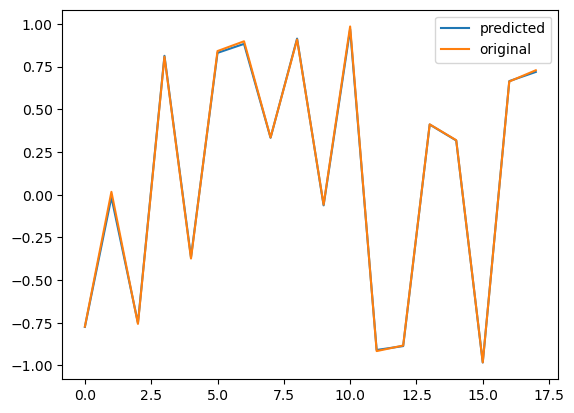

In [11]:

test_set = Mydataset(x_test, y_test)
test_pred = model(test_set[:][0].view(-1, seq_length, 1)).view(-1)
plt.plot(test_pred.detach().numpy(), label='predicted')
plt.plot(test_set[:][1].view(-1), label='original')
plt.legend()
plt.show()